In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
    
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3): # How many Layers?

        # Input Layers (4 futures) ---> h1 N--> N---> output (3 class)
        
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [3]:
# Instantiate the Model class using parameter defaults:
torch.manual_seed(32)
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [8]:
X = df.drop('target',axis=1)
y = df['target']

In [9]:
type(X)

pandas.DataFrame

In [10]:
X = X.values
y = y.values

In [11]:
type(X)

numpy.ndarray

In [12]:
from sklearn.model_selection import train_test_split


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

In [25]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [26]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [27]:
criterion = nn.CrossEntropyLoss()  # multi class clasification problem 
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  

In [28]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [29]:
epochs = 100
losses = []

for i in range(epochs):
    
    i+=1

    # Forward and get a prediction 
    
    y_pred = model.forward(X_train)

    #Calculation Loss/error
    loss = criterion(y_pred, y_train)
    
    losses.append(loss.item())
    
    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i}  loss: {loss.item()}')

    #Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 1  loss: 0.06713330000638962
epoch: 11  loss: 0.06468918174505234
epoch: 21  loss: 0.0642811506986618
epoch: 31  loss: 0.061122167855501175
epoch: 41  loss: 0.06003798916935921
epoch: 51  loss: 0.05880321189761162
epoch: 61  loss: 0.057634513825178146
epoch: 71  loss: 0.056555863469839096
epoch: 81  loss: 0.055558979511260986
epoch: 91  loss: 0.05461997911334038


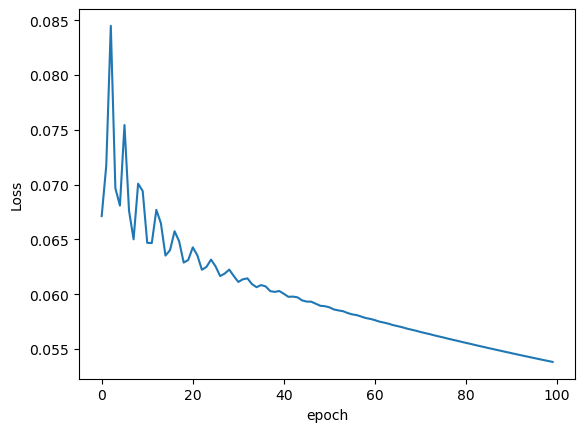

In [30]:
plt.plot(range(epochs), losses)

plt.ylabel('Loss')
plt.xlabel('epoch');

In [31]:
correct = 0

with torch.no_grad():

    for i,data in enumerate(X_test):

        y_val =model.forward(data)

        #1.) 2.) 3.)

        print(f'{i+1}.) {str(y_val)} {y_test[i]}')

        # 0 1 2

        if y_val.argmax().item() == y_test[i]:
            correct +=1

print(f'We got {correct} correct!')

1.) tensor([-5.9450,  6.0419, -1.5866]) 1
2.) tensor([-5.4857,  6.6860, -2.4669]) 1
3.) tensor([ 10.5241,   1.7310, -12.0736]) 0
4.) tensor([-9.3604,  5.6492,  0.7928]) 1
5.) tensor([-16.4189,   3.5212,   6.6947]) 2
6.) tensor([-22.4846,   1.1247,  11.8597]) 2
7.) tensor([ 10.3266,   1.9061, -12.1150]) 0
8.) tensor([ 11.7774,   1.6102, -13.0576]) 0
9.) tensor([-16.2264,   3.5822,   6.4665]) 2
10.) tensor([-20.5330,   2.3936,   9.9372]) 2
11.) tensor([-21.3362,   2.0876,  10.6005]) 2
12.) tensor([ 10.5121,   1.5128, -11.7876]) 0
13.) tensor([-20.2838,   1.8742,  10.1061]) 2
14.) tensor([-9.2530,  5.4738,  0.8538]) 1
15.) tensor([-17.3189,   3.1724,   7.4106]) 2
16.) tensor([-5.5013,  6.5064, -2.2830]) 1
17.) tensor([-13.0667,   3.9866,   4.2512]) 2
18.) tensor([ 12.0053,   1.6551, -13.3208]) 0
19.) tensor([-8.6018,  5.7530,  0.2035]) 1
20.) tensor([-17.4642,   4.0286,   6.8795]) 2
21.) tensor([ 11.1363,   1.6831, -12.5682]) 0
22.) tensor([ 12.3374,   1.8570, -13.8763]) 0
23.) tensor([-2

In [32]:
 print(f'{i+1}.) {str(y_val.argmax().item())} {y_test[i]}')

30.) 2 2


In [33]:
torch.save(model.state_dict(),'my_iris_model.pt')